

### Project 1. Análisis de la base de datos BOSTON

Ruth Corona Moreno

Curso de Inteligencia Artificial

04-Marzo-2020



In [0]:
from scipy import stats
import numpy as np
import pandas as pd 
import random
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy.polynomial.polynomial as poly
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

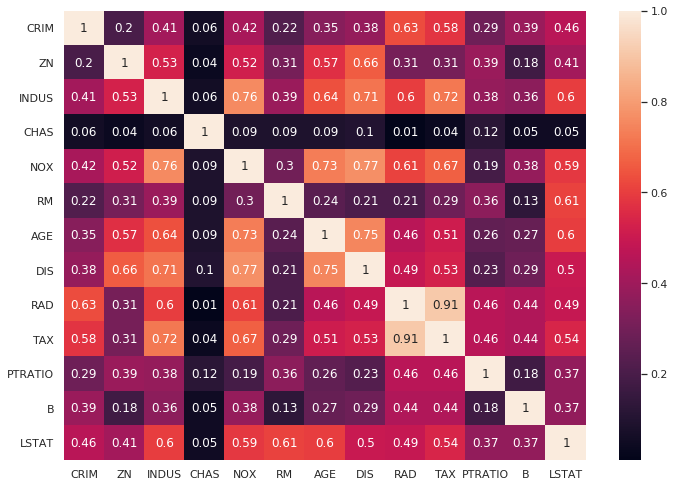

In [2]:
from sklearn.datasets import load_boston
data_set = load_boston()
data_set_df = pd.DataFrame(data_set.data, columns=data_set.feature_names)
data_set_df.head(3)
dim=data_set_df.shape

correlation_matrix = data_set_df.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
mask = np.zeros(correlation_matrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(data=abs(correlation_matrix), annot=True)

Con base en la matríz de correlaciones y considerando valores mayores o iguales a 0.7 en valor absoluto, se proponen las siguientes dependencias lineales; las cuales, en principio, serán analizadas mediante regresiones lineales, regresiones tipo LASSO Y RIDGE.



*   INDUS en función de TAX, DIS, NOX
*   AGE en función de NOX, DIS
*   DIS en función de AGE, NOX, INDUS
*   NOX en función de DIS, AGE, INDUS


# **1. Análisis de INDUS en función de TAX, DIS, NOX**

# 1.1 Regresión lineal de INDUS con respecto a TAX, DIS y NOX


In [4]:
features = ['TAX', 'DIS', 'NOX']
target = data_set_df['INDUS']

X1 = pd.DataFrame(np.c_[data_set_df['TAX'], data_set_df['DIS'], data_set_df['NOX']], columns = ['TAX','DIS', 'NOX'])
Y1 = data_set_df['INDUS']
X1_train=X1.sample(frac=0.8, replace=False, random_state=1) #random_state: fija la semilla 
X1_test=X1.drop(X1_train.index, axis=0) #df.index da los índices del dataFrame
Y1_train=Y1[X1_train.index]
Y1_test=Y1[X1_test.index]

#Entrenamiento del modelo
lin_model1 = LinearRegression()
lin_model1.fit(X1_train, Y1_train)

# Evaluación de la prueba
y1_test_predict = lin_model1.predict(X1_test)
rss1= 0.5*np.sum((Y1_test-y1_test_predict)**2)  
aic1=dim[0]*math.log(rss1/dim[0]+(2*X1.shape[1]*dim[0])/(dim[0]-X1.shape[1]-1))

print("Regresión lineal de INDUS con respecto a TAX, DIS y NOX")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss1))
print('AIC is {}'.format(aic1))


Regresión lineal de INDUS con respecto a TAX, DIS y NOX
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 804.5983233158952
AIC is 1028.7616761657043


# 1.2 Regresión lineal de INDUS con respecto a TAX, DIS, AGE y NOX

Dado que |cor(DIS, AGE)|=0.75, entonces se propone agregar la variable AGE al modelo de la sección 1.1

In [0]:
features = ['TAX', 'DIS', 'NOX', 'AGE']
target = data_set_df['INDUS']

X2 = pd.DataFrame(np.c_[data_set_df['TAX'], data_set_df['DIS'], data_set_df['NOX'], data_set_df['AGE']], columns = ['TAX','DIS', 'NOX', 'AGE'])
Y2 = data_set_df['INDUS']
X2_train=X2.sample(frac=0.8, replace=False, random_state=1) #random_state: fija la semilla 
X2_test=X2.drop(X2_train.index, axis=0) #df.index da los índices del dataFrame
Y2_train=Y2[X2_train.index]
Y2_test=Y2[X2_test.index]

#Entrenamiento del modelo
lin_model2 = LinearRegression()
lin_model2.fit(X2_train, Y2_train)

# Evaluación de la prueba
y2_test_predict = lin_model2.predict(X2_test)
rss2= 0.5*np.sum((Y2_test-y2_test_predict)**2)  
aic2=dim[0]*math.log(rss2/dim[0]+(2*X2.shape[1]*dim[0])/(dim[0]-X2.shape[1]-1))

print("Regresión lineal de INDUS con respecto a TAX, DIS, AGE y NOX")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss2))
print('AIC is {}'.format(aic2))

Regresión lineal de INDUS con respecto a TAX, DIS, AGE y NOX
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 798.0775513239781
AIC is 1147.4512174539666


# 1.3 Regresión lineal de INDUS con respecto a TAX, DIS

Dado que el AIC del modelo de la sección 1.2 es mayor al de la sección 1.1, se conjetura que si dos variables tienen una correlación alta en valor absoluto, entonces es recomendable no agregarlas simultáneamente como predictoras. Y como las variables AGE y NOX tienen una fuerte correlación en valor absoluto con DIS, entonces se propone eliminarlas del modelo 1.1

In [0]:
features = ['TAX', 'DIS']
target = data_set_df['INDUS']

X3 = pd.DataFrame(np.c_[data_set_df['TAX'], data_set_df['DIS']], columns = ['TAX','DIS'])
Y3 = data_set_df['INDUS']
X3_train=X3.sample(frac=0.8, replace=False, random_state=1) #random_state: fija la semilla 
X3_test=X3.drop(X3_train.index, axis=0) #df.index da los índices del dataFrame
Y3_train=Y3[X3_train.index]
Y3_test=Y3[X3_test.index]

#Entrenamiento del modelo
lin_model3 = LinearRegression()
lin_model3.fit(X3_train, Y3_train)

# Evaluación de la prueba
y3_test_predict = lin_model3.predict(X3_test)
rss3= 0.5*np.sum((Y3_test-y3_test_predict)**2)  
aic3=dim[0]*math.log(rss3/dim[0]+(2*X3.shape[1]*dim[0])/(dim[0]-X3.shape[1]-1))

print("Regresión lineal de INDUS con respecto a TAX, DIS")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss3))
print('AIC is {}'.format(aic3))

Regresión lineal de INDUS con respecto a TAX, DIS
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 847.7938699057224
AIC is 880.6171864125859


# 1.3.1 Regresión LASSO de INDUS con respecto a TAX, DIS

Dado que el AIC del modelo de la sección 1.3 es menor que los anteriores, se concluye que es un buen modelo, sin embargo ¿será posible que bajo una penalización del **valor absoluto** de los coeficientes (LASSO) proporcione una mejor predicción?

In [0]:
ls = Lasso(alpha=0.1,normalize=True, max_iter=1e6)
ls.fit(X3_train,Y3_train)
y_pred_train_ls=ls.predict(X3_train)
y_pred_test_ls=ls.predict(X3_test)

rss_ls= 0.5*np.sum((Y3_test-y_pred_test_ls)**2)  
aic_ls=dim[0]*math.log(rss2/dim[0]+(2*X3.shape[1]*dim[0])/(dim[0]-X3.shape[1]-1))

print("Regresión LASSO de INDUS con respecto a TAX, DIS")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss_ls))
print('AIC is {}'.format(aic_ls))

Regresión LASSO de INDUS con respecto a TAX, DIS
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 1142.263810413271
AIC is 871.8179464392064


Se observa que el AIC es menor que el de los modelos anteriores, entonces este es un mejor modelo para la predicción de INDUS con una pensalización alpha=0.1.

# 1.3.2 Regresión RIDGE de INDUS con respecto a TAX, DIS

¿Qué valor de AIC se obtiene bajo una penalización del **cuadrado** de los coeficientes (RIDGE)?

In [0]:
rr = Ridge(alpha=0.5) #a higher value of alpha restricts the coefficients further
rr.fit(X3_train,Y3_train)
Y_pred_train_rr = rr.predict(X3_train) #predictions on training data
Y_pred_test_rr = rr.predict(X3_test) #predictions on testing data

rss_rr= 0.5*np.sum((Y3_test-Y_pred_test_rr)**2)  
aic_rr=dim[0]*math.log(rss_rr/dim[0]+(2*X3.shape[1]*dim[0])/(dim[0]-X3.shape[1]-1))

print("Regresión RIDGE de INDUS con respecto a TAX, DIS")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss_rr))
print('AIC is {}'.format(aic_rr))

Regresión RIDGE de INDUS con respecto a TAX, DIS
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 847.8232416391519
AIC is 880.6223399198275


Se observa que el AIC es mejor que el presentado por los modelos 1.1, 1.2 y 1.3, pero no lo es con respecto al modelo 1.3.1. Por lo tanto, se concluye que un buen modelo para predecir INDUS en función de TAX y DIS es la regresión LASSO  con una penalización alfa=0.1

# **2. Análisis de AGE en función de NOX, DIS**

# 2.1 Regresión lineal de AGE con respecto a NOX y DIS

In [0]:
features = ['NOX', 'DIS']
target = data_set_df['AGE']

X4 = pd.DataFrame(np.c_[data_set_df['NOX'], data_set_df['DIS']], columns = ['NOX','DIS'])
Y4 = data_set_df['AGE']
X4_train=X4.sample(frac=0.6, replace=False, random_state=1) #random_state: fija la semilla 
X4_test=X4.drop(X4_train.index, axis=0) #df.index da los índices del dataFrame
Y4_train=Y4[X4_train.index]
Y4_test=Y4[X4_test.index]

lin_model4 = LinearRegression()
lin_model4.fit(X4_train, Y4_train)

# Evaluación de la prueba
y4_test_predict = lin_model4.predict(X4_test)
rss4= 0.5*np.sum((Y4_test-y4_test_predict)**2)  
aic4=dim[0]*math.log(rss4/dim[0]+(2*X4.shape[1]*dim[0])/(dim[0]-X4.shape[1]-1))

print("Análisis de AGE en función de NOX, DIS")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss4))
print('AIC score is {}'.format(aic4))


Análisis de AGE en función de NOX, DIS
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 29329.271669161186
AIC score is 2088.222620339198


# 2.1.1 Regresión LASSO de AGE con respecto a NOX y DIS

In [0]:
ls2 = Lasso(alpha=0.1,normalize=True, max_iter=1e6)
ls2.fit(X4_train,Y4_train)
y_pred_train_ls2=ls2.predict(X4_train)
y_pred_test_ls2=ls2.predict(X4_test)

rss_ls2= 0.5*np.sum((Y4_test-y_pred_test_ls2)**2)  
aic_ls2=dim[0]*math.log(rss_ls2/dim[0]+(2*X4.shape[1]*dim[0])/(dim[0]-X4.shape[1]-1))

print("Regresión LASSO de AGE con respecto a NOX y DIS")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss_ls2))
print('AIC is {}'.format(aic_ls2))

Regresión LASSO de AGE con respecto a NOX y DIS
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 29202.91258472515
AIC is 2086.180020850973


# 2.1.2 Regresión RIDGE de AGE con respecto a NOX y DIS

In [0]:
rr2 = Ridge(alpha=0.5) #a higher value of alpha restricts the coefficients further
rr2.fit(X4_train,Y4_train)
Y_pred_train_rr2 = rr2.predict(X4_train) #predictions on training data
Y_pred_test_rr2 = rr2.predict(X4_test) #predictions on testing data

rss_rr2= 0.5*np.sum((Y4_test-Y_pred_test_rr2)**2)  
aic_rr2=dim[0]*math.log(rss_rr2/dim[0]+(2*X4.shape[1]*dim[0])/(dim[0]-X4.shape[1]-1))

print("Regresión RIDGE de AGE con respecto a NOX, DIS")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss_rr2))
print('AIC is {}'.format(aic_rr2))

Regresión RIDGE de AGE con respecto a NOX, DIS
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 28572.990635189995
AIC is 2075.8724510141183


Se observa que el AIC obtenido con regresión RIDGE con alfa=0.5 es menor que el obtenido con regresión lineal y LASSO, por lo que se concluye que es un buen modelo de predicción de AGE con respecto a NOX y DIS

# **3. Análisis de DIS en función de AGE, NOX e INDUS**

# 3.1 Regresión lineal de DIS con respecto a AGE, NOX e INDUS

In [0]:
features = ['AGE', 'NOX', 'INDUS']
target = data_set_df['DIS']

X5 = pd.DataFrame(np.c_[data_set_df['AGE'], data_set_df['NOX'], data_set_df['INDUS']], columns = ['AGE','NOX','INDUS'])
Y5 = data_set_df['DIS']
X5_train=X5.sample(frac=0.6, replace=False, random_state=1) #random_state: fija la semilla 
X5_test=X5.drop(X5_train.index, axis=0) #df.index da los índices del dataFrame
Y5_train=Y5[X5_train.index]
Y5_test=Y5[X5_test.index]

lin_model5 = LinearRegression()
lin_model5.fit(X5_train, Y5_train)

# Evaluación de la prueba
y5_test_predict = lin_model5.predict(X5_test)
rss5= 0.5*np.sum((Y5_test-y5_test_predict)**2)  
aic5=dim[0]*math.log(rss5/dim[0]+(2*X5.shape[1]*dim[0])/(dim[0]-X5.shape[1]-1))


print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss5))
print('AIC score is {}'.format(aic5))

Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 155.08904024939739
AIC score is 935.6613693331589


# 3.2 Regresión lineal de DIS con respecto a AGE e INDUS

Se propone eliminar la dependencia a la variable NOX del modelo de la sección 3.1, dado que cor(NOX, INDUS)=0.76

In [0]:
features = ['AGE', 'INDUS']
target = data_set_df['DIS']

X6 = pd.DataFrame(np.c_[data_set_df['AGE'], data_set_df['INDUS']], columns = ['AGE', 'INDUS'])
Y6 = data_set_df['DIS']
X6_train=X6.sample(frac=0.6, replace=False, random_state=1) #random_state: fija la semilla 
X6_test=X6.drop(X6_train.index, axis=0) #df.index da los índices del dataFrame
Y6_train=Y6[X6_train.index]
Y6_test=Y6[X6_test.index]

lin_model6 = LinearRegression()
lin_model6.fit(X6_train, Y6_train)

# Evaluación de la prueba
y6_test_predict = lin_model6.predict(X6_test)
rss6= 0.5*np.sum((Y6_test-y6_test_predict)**2)  
aic6=dim[0]*math.log(rss6/dim[0]+(2*X6.shape[1]*dim[0])/(dim[0]-X6.shape[1]-1))

print("Regresión lineal de DIS con respecto a AGE e INDUS")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss6))
print('AIC score is {}'.format(aic6))

Regresión lineal de DIS con respecto a AGE e INDUS
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 168.09438637676647
AIC score is 744.6133048892278


# 3.3 Regresión lineal de DIS con respecto a AGE y NOX

Se propone eliminar la dependencia a la variable INDUS del modelo de la sección 3.1, dado que cor(NOX, INDUS)=0.76

In [0]:
features = ['AGE', 'NOX']
target = data_set_df['DIS']

X7 = pd.DataFrame(np.c_[data_set_df['AGE'], data_set_df['NOX']], columns = ['AGE', 'NOX'])
Y7 = data_set_df['DIS']
X7_train=X7.sample(frac=0.6, replace=False, random_state=1) #random_state: fija la semilla 
X7_test=X7.drop(X7_train.index, axis=0) #df.index da los índices del dataFrame
Y7_train=Y7[X7_train.index]
Y7_test=Y7[X7_test.index]

lin_model7 = LinearRegression()
lin_model7.fit(X7_train, Y7_train)

# Evaluación de la prueba
y7_test_predict = lin_model7.predict(X7_test)
rss7= 0.5*np.sum((Y7_test-y7_test_predict)**2)  
aic7=dim[0]*math.log(rss7/dim[0]+(2*X7.shape[1]*dim[0])/(dim[0]-X7.shape[1]-1))

print("Regresión lineal de DIS con respecto a AGE y NOX")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss7))
print('AIC score is {}'.format(aic7))

Regresión lineal de DIS con respecto a AGE y NOX
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 164.62210604224666
AIC score is 743.8155613244617


# 3.3.1 Regresión LASSO de DIS con respecto a AGE y NOX

In [0]:
ls3 = Lasso(alpha=0.1,normalize=True, max_iter=1e6)
ls3.fit(X7_train,Y7_train)
y_pred_train_ls3=ls3.predict(X7_train)
y_pred_test_ls3=ls3.predict(X7_test)

rss_ls3= 0.5*np.sum((Y7_test-y_pred_test_ls3)**2)  
aic_ls3=dim[0]*math.log(rss_ls3/dim[0]+(2*X7.shape[1]*dim[0])/(dim[0]-X7.shape[1]-1))

print("Regresión LASSO de DIS con respecto a AGE y NOX")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss_ls3))
print('AIC is {}'.format(aic_ls3))

Regresión LASSO de DIS con respecto a AGE y NOX
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 499.96965732308485
AIC is 815.5823890170335


Se observa que el el AIC aumenta con respecto al obtenido en el modelo de la sección 3.3, por tanto no es un mejor modelo para la predicción de DIS en función de AGE y NOX

# 3.3.2 Regresión RIDGE de DIS con respecto a AGE y NOX

In [0]:
rr3 = Ridge(alpha=0.5) #a higher value of alpha restricts the coefficients further
rr3.fit(X7_train,Y7_train)
Y_pred_train_rr3 = rr3.predict(X7_train) #predictions on training data
Y_pred_test_rr3 = rr3.predict(X7_test) #predictions on testing data

rss_rr3= 0.5*np.sum((Y7_test-Y_pred_test_rr3)**2)  
aic_rr3=dim[0]*math.log(rss_rr3/dim[0]+(2*X7.shape[1]*dim[0])/(dim[0]-X7.shape[1]-1))

print("Regresión RIDGE de DIS con respecto a AGE, NOX")
print("Ajuste del modelo con datos de PRUEBA")
print("--------------------------------------")
print('RSS is {}'.format(rss_rr3))
print('AIC is {}'.format(aic_rr3))

Regresión RIDGE de DIS con respecto a AGE, NOX
Ajuste del modelo con datos de PRUEBA
--------------------------------------
RSS is 161.78603837744163
AIC is 743.1630508299432


A diferencia del modelo LASSO, se observa que al penalizar los coeficientes con una regresión RIDGE con alfa=0.5, se obtiene un menor AIC que con los dos modelos anteriores. Por tanto se concluye que este es un buen modelo para la prediccoión de DIS con respecto a AGE y NOX

# **4. Análisis de NOX en función de DIS**

Dado que el scatterplot de la variable NOX con respecto a DIS muestra un comportamiento no lineal, se procede a hacer un ajuste polinomial

Text(0, 0.5, 'NOX')

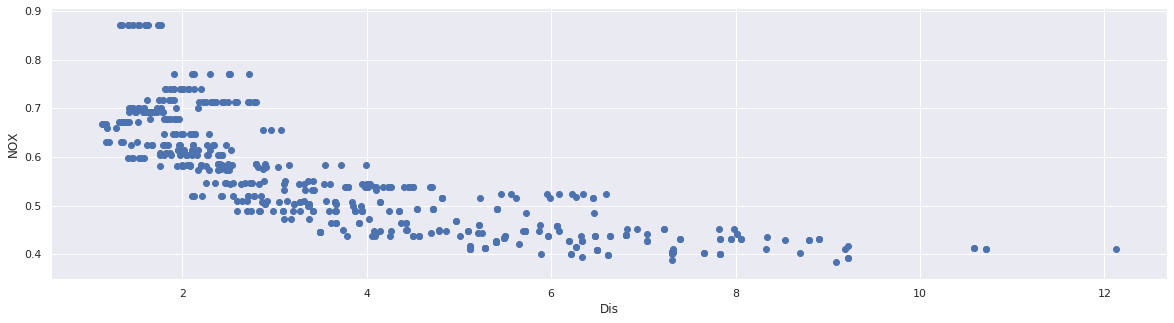

In [10]:
plt.figure(figsize=(20, 5))
x = data_set_df['DIS']
y = data_set_df['NOX']
plt.scatter(x, y, marker='o')
plt.xlabel('Dis')
plt.ylabel('NOX')


No handles with labels found to put in legend.
No handles with labels found to put in legend.


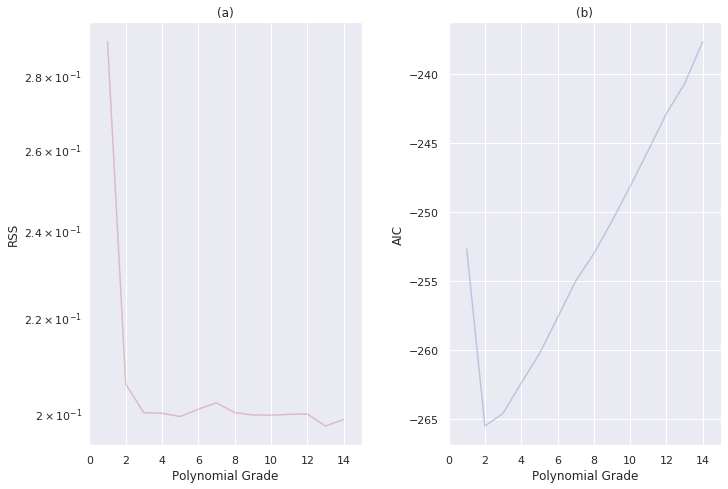

In [24]:
X = data_set_df['DIS']
Y = data_set_df['NOX']
X_train=X.sample(frac=0.8, replace=False, random_state=1) #random_state: fija la semilla 
X_test=X.drop(X_train.index, axis=0) #df.index da los índices del dataFrame
Y_train=Y[X_train.index]
Y_test=Y[X_test.index]

Pol_Max = 15 # Highest degree polynomial we are going to check.
# empty arrays
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(X_train, Y_train, i+1)
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((Y_test-model(X_test))**2)
        AICv[i]=len(X_test)*math.log10(RSSv[i]/len(X_test))+ 2*len(coef)*len(X_test)/(len(X_test)-len(coef)-1)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.show()

Dada la gráica del valor AIC con respecto al grado del polinomio ajustado, se escoge el polinomio de grado 2 como mejor modelo de predicción de NOX con respecto a la variable DIS.
